In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

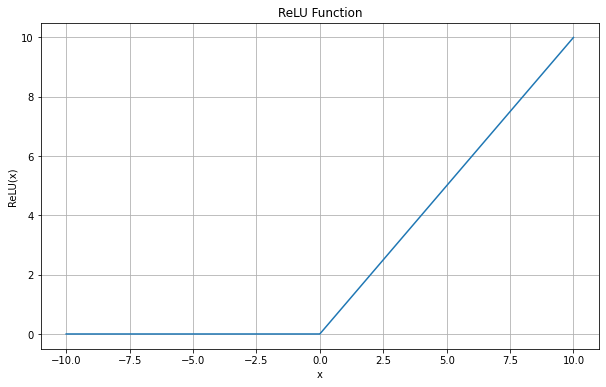

In [2]:
# Define an array of numbers
x = np.linspace(-10, 10, 1000)

# Pass these numbers through the ReLU function
y = tf.nn.relu(x)

# Plot the ReLU function
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.show()


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T-shirt/top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

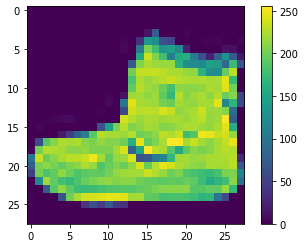

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images = train_images/255.0
test_images = test_images/255.0

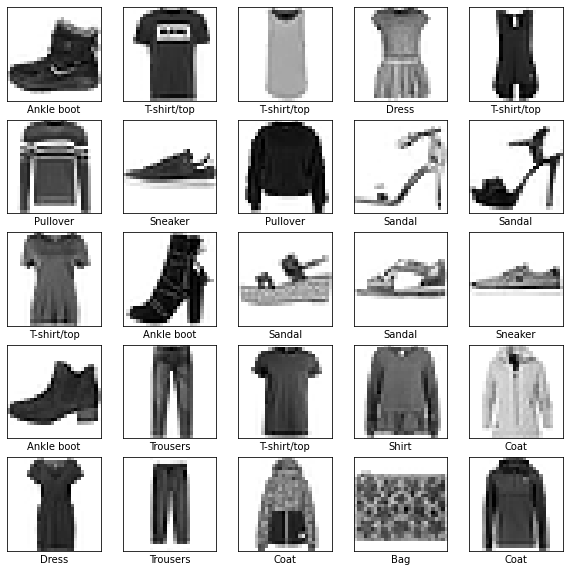

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [11]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4978 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3773 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3381 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3143 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2981 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2825 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2703 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2628 - accuracy: 0.9024
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2507 - accuracy: 0.9060
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.242

In [13]:
#ocena modelu
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f'test modelu -> accuracy: {test_acc} ,strata: {test_loss}')

313/313 - 1s - loss: 0.3248 - accuracy: 0.8834 - 582ms/epoch - 2ms/step
test modelu -> accuracy: 0.883400022983551 ,strata: 0.32480287551879883


In [14]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [16]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [17]:
predictions[0]

array([2.9853695e-07, 7.5537699e-08, 1.3602680e-08, 6.1055458e-09,
 9.4421310e-08, 3.3697460e-03, 4.1952385e-06, 2.4349408e-02,
 9.0882185e-07, 9.7227526e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

In [23]:
#funkcja ryzująca obraz
def plot_image(i,predictions_array,true_label,img):
    true_label,img = true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color='red'
    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]
    ),color=color)

In [27]:
#funkcja reprezentująca wykres 
def plot_value_array(i,predictions_array,true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])

    thisplot = plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

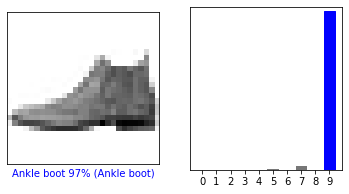

In [28]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

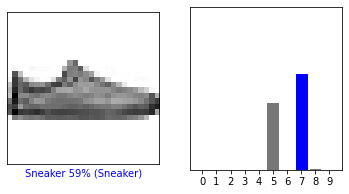

In [29]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

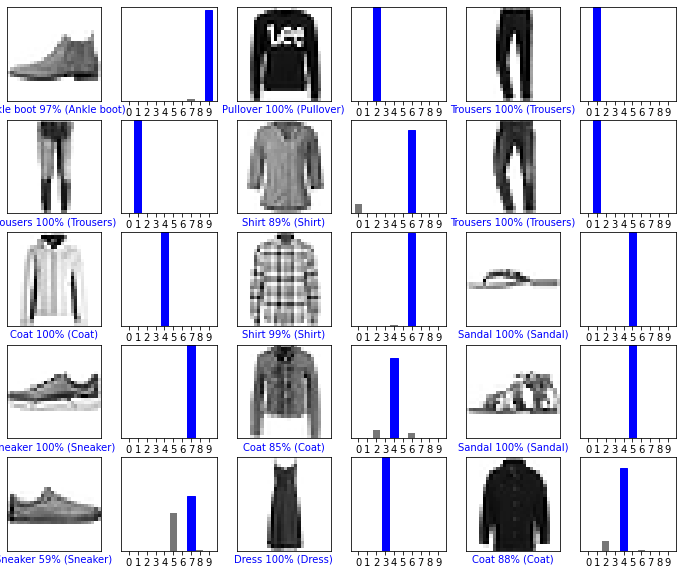

In [30]:
num_rows = 5
num_cols = 3

num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i],test_labels)

plt.show()